# MALARIA DETECTION

### Importing Libraries

In [1]:
# importing the libraries for loading data and visualisation
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image
import seaborn as sns

# import for train-test-split
from sklearn.model_selection import train_test_split

# import for One Hot Encoding
from keras.utils import to_categorical

# importing libraries for Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

# importing libraries for evaluating the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Loading Data and Train-Test-Split 

In [2]:
# loading the data of images and setting their labels
data = []
labels = []

Parasitized = os.listdir("../input/cell-images-for-detecting-malaria/cell_images/Parasitized/")

for a in Parasitized:
    
    try:
        image = cv2.imread("../input/cell-images-for-detecting-malaria/cell_images/Parasitized/" + a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    
    except AttributeError:
        print("")

Uninfected = os.listdir("../input/cell-images-for-detecting-malaria/cell_images/Uninfected/")

for b in Uninfected:

    try:
        image = cv2.imread("../input/cell-images-for-detecting-malaria/cell_images/Uninfected/" + b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    
    except AttributeError:
        print("")

# Creating single numpy array of all the images and labels
data = np.array(data)
labels = np.array(labels)

print('Cells : {} and labels : {}'.format(data.shape , labels.shape))

# lets shuffle the data and labels before splitting them into training and testing sets
n = np.arange(data.shape[0])
np.random.shuffle(n)
data = data[n]
labels = labels[n]



Cells : (27558, 50, 50, 3) and labels : (27558,)


In [3]:
### Splitting the dataset into the Training set and Test set

X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size = 0.2, random_state = 0)

print('Train data shape {} ,Test data shape {} '.format(X_train.shape, X_valid.shape))

Train data shape (22046, 50, 50, 3) ,Test data shape (5512, 50, 50, 3) 


In [4]:
X_train = X_train.astype('float32')  
X_valid = X_valid.astype('float32')

In [5]:
# One Hot Encoding 
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

## Building Model

In [6]:
# Defining Model
classifier = Sequential()

# CNN layers
classifier.add(Conv2D(32, kernel_size=(3, 3), input_shape = (50, 50, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.5))   # Dropout prevents overfitting

classifier.add(Conv2D(32, kernel_size=(3, 3), input_shape = (50, 50, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.5))

classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.5))

classifier.add(Dense(units=2, activation='softmax')) 

In [7]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history = classifier.fit(X_train, y_train, batch_size=120, epochs=15, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/15
184/184 [==============================] - 35s 188ms/step - loss: 0.8184 - accuracy: 0.6335 - val_loss: 1.1224 - val_accuracy: 0.5381
Epoch 2/15
184/184 [==============================] - 34s 186ms/step - loss: 0.5323 - accuracy: 0.7513 - val_loss: 3.7602 - val_accuracy: 0.5142
Epoch 3/15
184/184 [==============================] - 35s 190ms/step - loss: 0.3502 - accuracy: 0.8630 - val_loss: 2.3590 - val_accuracy: 0.6333
Epoch 4/15
184/184 [==============================] - 34s 183ms/step - loss: 0.2813 - accuracy: 0.8928 - val_loss: 0.5241 - val_accuracy: 0.8483
Epoch 5/15
184/184 [==============================] - 34s 186ms/step - loss: 0.2409 - accuracy: 0.9116 - val_loss: 0.7730 - val_accuracy: 0.8091
Epoch 6/15
184/184 [==============================] - 34s 186ms/step - loss: 0.2181 - accuracy: 0.9208 - val_loss: 0.4525 - val_accuracy: 0.8639
Epoch 7/15
184/184 [==============================] - 34s 187ms/step - loss: 0.2018 - accuracy: 0.9280 - val_loss: 0.2444 - val_ac

In [9]:
print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(X_valid, y_valid)[1]*100))

173/173 [==============================] - 3s 16ms/step - loss: 0.2161 - accuracy: 0.9318
Test_Accuracy: 93.18%


-  Summary of the Model

In [10]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        1

## Prediction, Evaluation and Testing of the Model

- Lets do our first prediction using predict and predict X_valid and store in y_pred variable

In [11]:
y_pred = classifier.predict(X_valid)

In [12]:
# Convert back to categorical values 
y_pred = np.argmax(y_pred, axis=1)
y_valid = np.argmax(y_valid, axis=1)

In [13]:
print('Accuracy Score: ', accuracy_score(y_valid, y_pred))

Accuracy Score:  0.9317851959361393


- Evaluation of the CNN model by Plotting Confusion Matrix 

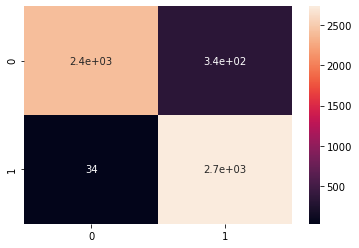

In [14]:
# Plotting the Confusion Matrix
conf = confusion_matrix(y_valid, y_pred)
sns.heatmap(conf, annot=True)

In [ ]:
classifier.save("Models/malaria.h5")